In [50]:

import numpy as np
import pandas as pd


In [51]:
from bs4 import BeautifulSoup

In [52]:
df = pd.read_csv('../data/mpst_full_data.csv', delimiter=',')
nRow, nCol = df.shape
df.head(5)

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb


# Preprocessing

In [53]:
import re #regular expression

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [54]:
from tqdm import tqdm
preprocessed_synopsis = []
# tqdm is for printing the status bar
for sentence in df['plot_synopsis'].values:
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'html.parser').get_text()
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    # https://gist.github.com/sebleier/554280
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
    preprocessed_synopsis.append(sentence.strip())
df['preprocessed_plots']=preprocessed_synopsis

In [55]:
def remove_spaces(x):
    x=x.split(",")
    nospace=[]
    for item in x:
        item=item.lstrip()
        nospace.append(item)
    return (",").join(nospace)

df['tags']=df['tags'].apply(remove_spaces)
df['tags']

0                    cult,horror,gothic,murder,atmospheric
1                                                 violence
2                                                 romantic
3                      inspiring,romantic,stupid,feel-good
4        cruelty,murder,dramatic,cult,violence,atmosphe...
                               ...                        
14823                                        comedy,murder
14824                            good versus evil,violence
14825                                             anti war
14826                                               murder
14827                                       christian film
Name: tags, Length: 14828, dtype: object

In [56]:
train=df.loc[df.split=='train']
train=train.reset_index()
test=df.loc[df.split=='test']
test=test.reset_index()

In [57]:
cv=df.loc[df.split=="val"]
cv=cv.reset_index()

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary=True)
y_train = vectorizer.fit_transform(train['tags']).toarray()
y_test = vectorizer.transform(test['tags']).toarray()

print(y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\ASUS\Documents\DEV\scientificProject\.venv\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [59]:
train[train['tags'] == 'absurd']

,index,imdb_id,title,plot_synopsis,tags,split,synopsis_source,preprocessed_plots
2250,3562,tt3062074,Sharknado 2: The Second One,Fin Shepard (Ian Ziering) and April Wexler (Ta...,absurd,train,imdb,fin shepard ian ziering april wexler tara reid...
4533,7178,tt0172543,He Died with a Felafel in His Hand,"=== Prologue ===\nDanny (Noah Taylor), enters ...",absurd,train,wikipedia,prologue danny noah taylor enters lounge sydne...
7893,12377,tt0066561,When Dinosaurs Ruled the Earth,A tribe on a cliff are about to sacrifice thre...,absurd,train,wikipedia,tribe cliff sacrifice three blonde women three...
8614,13471,tt0231956,The Last Man,=== Introduction ===\nMary Shelley states in t...,absurd,train,wikipedia,introduction mary shelley states introduction ...


In [60]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
y_train_reshaped_row1 = y_train[9000].reshape(-1,1)
y_train_reshaped_row2 = y_train[1000].reshape(-1,1)

y_train_reshaped_row1 == y_train_reshaped_row2

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [62]:
y_train_reshaped_row = y_train[9000].reshape(-1,1)
vectorizer.inverse_transform(y_train_reshaped_row)

[array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array(['absurd'], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 arr

In [63]:
def max_len(x):
    a=x.split()
    return len(a)

max(df['plot_synopsis'].apply(max_len))

11406

In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers

In [65]:
vect=Tokenizer()
vect.fit_on_texts(train['plot_synopsis'])
vocab_size = len(vect.word_index) + 1
print(vocab_size)

122195


In [66]:
encoded_docs_train = vect.texts_to_sequences(train['preprocessed_plots'])
max_length = vocab_size
padded_docs_train = pad_sequences(encoded_docs_train, maxlen=1200, padding='post')
print(padded_docs_train)

[[  779  4660 62208 ...     0     0     0]
 [   51  4481   143 ...     0     0     0]
 [ 3063   429   188 ...    75   140  6946]
 ...
 [  140  2717   539 ...     0     0     0]
 [ 5118  2731  3015 ...     0     0     0]
 [ 1269  2392  2530 ...     0     0     0]]


In [67]:
encoded_docs_test =  vect.texts_to_sequences(test['preprocessed_plots'])
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=1200, padding='post')
encoded_docs_cv = vect.texts_to_sequences(cv['preprocessed_plots'])
padded_docs_cv = pad_sequences(encoded_docs_cv, maxlen=1200, padding='post')

In [68]:
model = keras.Sequential()
# Configuring the parameters
model.add(layers.Embedding(vocab_size, output_dim=50, input_length=1200))
model.add(layers.LSTM(128, return_sequences=True))  
# Adding a dropout layer
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(64))
model.add(layers.Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(layers.Dense(71, activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1200, 50)          6109750   
                                                                 
 lstm (LSTM)                 (None, 1200, 128)         91648     
                                                                 
 dropout (Dropout)           (None, 1200, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 71)                4615      
                                                                 
Total params: 6255421 (23.86 MB)
Trainable params: 62554

In [69]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = METRICS)

In [70]:
history = model.fit(padded_docs_train,y_train,
                        epochs = 10,
                        verbose = 1,
                        validation_data=(padded_docs_test, y_test),
                        batch_size=16)

Epoch 1/10
594/594 [==============================] - 1349s 2s/step - loss: 0.1719 - tp: 1396.0000 - fp: 8458.0000 - tn: 637239.0000 - fn: 26626.0000 - accuracy: 0.9479 - precision: 0.1417 - recall: 0.0498 - auc: 0.7537 - val_loss: 0.1418 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 201564.0000 - val_fn: 9022.0000 - val_accuracy: 0.9572 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8301
Epoch 2/10
594/594 [==============================] - 1276s 2s/step - loss: 0.1468 - tp: 406.0000 - fp: 1141.0000 - tn: 644556.0000 - fn: 27616.0000 - accuracy: 0.9573 - precision: 0.2624 - recall: 0.0145 - auc: 0.7994 - val_loss: 0.1425 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 201564.0000 - val_fn: 9022.0000 - val_accuracy: 0.9572 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8283
Epoch 3/10
594/594 [==============================] - 1424s 2s/step - loss: 0.1438 - tp: 130.0000 - fp: 208.0000 - tn: 645489.0000 - fn: 27892.0000 - accuracy: 0.9583 

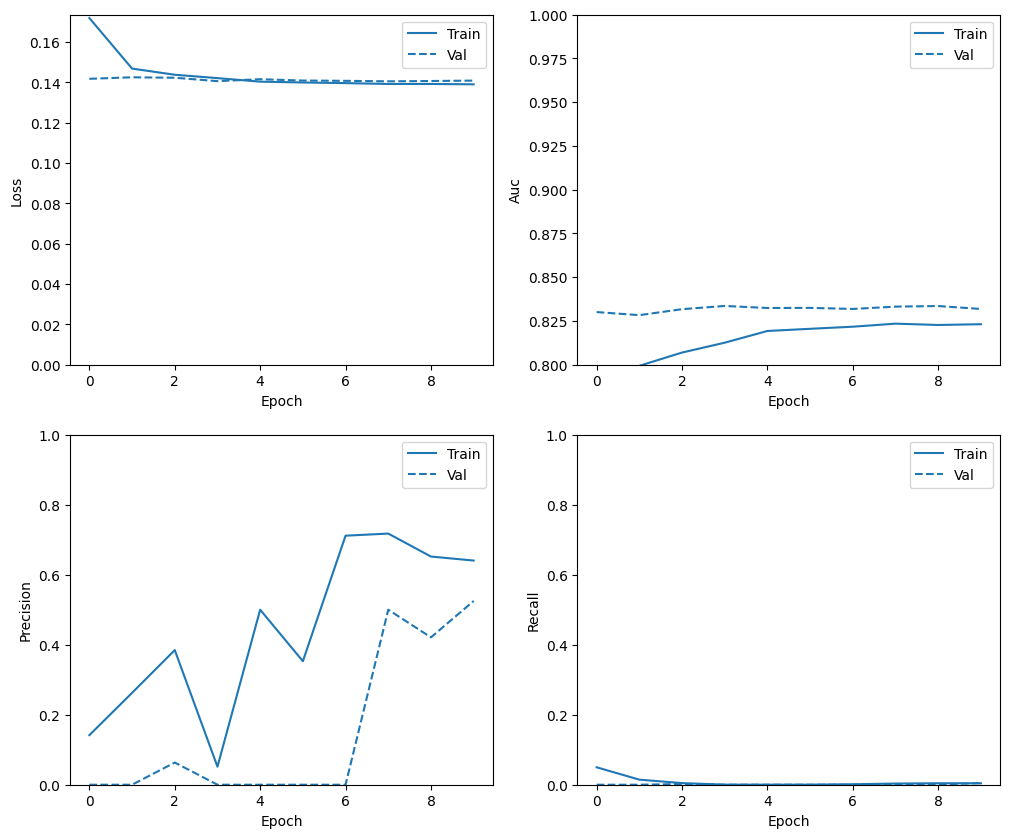

In [71]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend()

plot_metrics(history)

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [73]:
predictions=model.predict([padded_docs_test])
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for val in thresholds:
    print("For threshold: ", val)
    pred=predictions.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
  
    precision = precision_score(y_test, pred, average='micro')
    recall = recall_score(y_test, pred, average='micro')
    f1 = f1_score(y_test, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

93/93 [==============================] - 66s 669ms/step
For threshold:  0.1
Micro-average quality numbers
Precision: 0.2093, Recall: 0.5766, F1-measure: 0.3071
For threshold:  0.2
Micro-average quality numbers
Precision: 0.3329, Recall: 0.2521, F1-measure: 0.2869
For threshold:  0.3
Micro-average quality numbers
Precision: 0.3814, Recall: 0.1446, F1-measure: 0.2097
For threshold:  0.4
Micro-average quality numbers
Precision: 0.4748, Recall: 0.0146, F1-measure: 0.0284
For threshold:  0.5
Micro-average quality numbers
Precision: 0.5250, Recall: 0.0047, F1-measure: 0.0092
For threshold:  0.6
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.7
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.8


C:\Users\ASUS\Documents\DEV\scientificProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\Documents\DEV\scientificProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\Documents\DEV\scientificProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000
For threshold:  0.9
Micro-average quality numbers
Precision: 0.0000, Recall: 0.0000, F1-measure: 0.0000


C:\Users\ASUS\Documents\DEV\scientificProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [123]:
def predict_sample():
    t = train.sample(1)

    
    encoded_docs = vect.texts_to_sequences(t['preprocessed_plots'])
    padded_docs = pad_sequences(encoded_docs, maxlen=1200, padding='post')
    pred = model.predict(padded_docs)
    print(pred)
    for i in range(len(pred[0])):
        if(pred[0][i] < 0.1):
            pred[0][i] = 0
        else:
            pred[0][i] = 1
    
    print("Original tags -->", t['tags'].values)
    print("Predicted tags -->", vectorizer.inverse_transform(pred)[0])

predict_sample()

1/1 [==============================] - 0s 183ms/step
[[0.01300761 0.03778732 0.00699193 0.00859821 0.00450084 0.00842898
  0.00548991 0.0186711  0.00210703 0.01831819 0.0044949  0.0097258
  0.02359893 0.00556005 0.00202788 0.0038885  0.00374696 0.1234563
  0.00524437 0.02557384 0.17158753 0.00907794 0.02084315 0.01314831
  0.01991413 0.03360426 0.04094912 0.00311799 0.16881277 0.04537691
  0.03192179 0.0042666  0.00842252 0.01454629 0.00754102 0.00820553
  0.02502566 0.04814516 0.04083819 0.0053787  0.00988488 0.0027989
  0.03115544 0.37798396 0.02343897 0.04046535 0.00240492 0.0328012
  0.01292863 0.01136197 0.01100793 0.01730939 0.10901235 0.01431644
  0.0054249  0.0123993  0.17336045 0.17089021 0.03810842 0.05137795
  0.01468107 0.01305241 0.0216821  0.00714029 0.00239239 0.06614389
  0.0055281  0.03660708 0.28525966 0.00378662 0.00378734]]
Original tags --> ['mystery,neo noir,murder,suspenseful,violence,intrigue,revenge']
Predicted tags --> ['comedy' 'cult' 'flashback' 'murder' 'ps

In [114]:
model.save('../models/sparkv1')

TypeError: Binding inputs to tf.function failed due to `missing a required argument: 'inputs'`. Received args: ([TensorSpec(shape=(None, None, 50), dtype=tf.float32, name=None)],) and kwargs: {'training': True} for signature: (self, inputs, mask=<captured_default_value>, training=<captured_default_value>, initial_state=<captured_default_value>).

In [78]:
vectorizer.inverse_transform(pred[0].reshape(-1,1))

[array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], dtype='<U18'),
 array([], d